# Credit-Risk Modelling

## EDA

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('Credit_default_dataset_kaggle.csv')
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [47]:
data.drop(["ID"], axis=1, inplace= True)

In [48]:
descriptive_stats = data.describe()
descriptive_stats

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


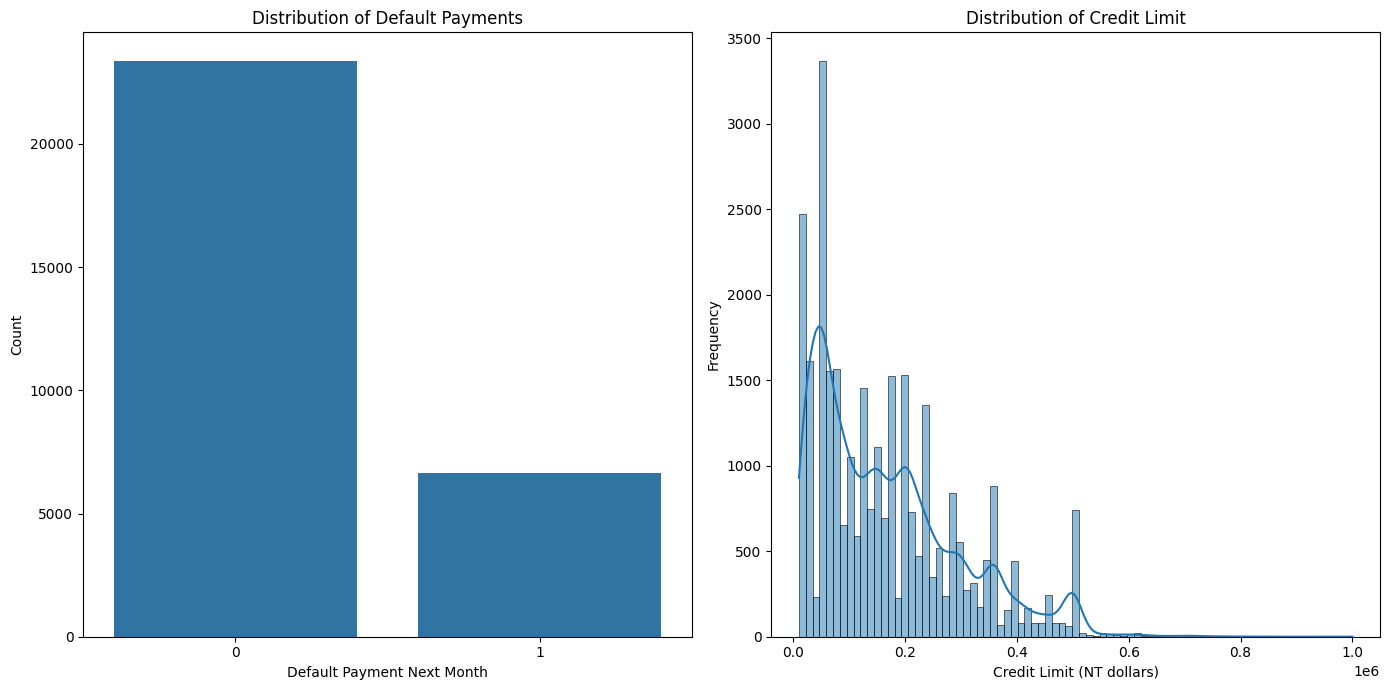

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 7))

# Distribution of the target variable
plt.subplot(1, 2, 1)
sns.countplot(x='default.payment.next.month', data=data)
plt.title('Distribution of Default Payments')
plt.xlabel('Default Payment Next Month')
plt.ylabel('Count')

# Distribution of the credit limit
plt.subplot(1, 2, 2)
sns.histplot(data['LIMIT_BAL'], kde=True)
plt.title('Distribution of Credit Limit')
plt.xlabel('Credit Limit (NT dollars)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Distribution of Default Payments: The majority of applicants in the dataset did not default on their loans, as indicated by the count of 0 (No Default) being significantly higher than 1 (Default).

Distribution of Credit Limit: The credit limit among applicants is skewed, with most applicants having lower credit limits, and a long tail extending towards higher credit limits.

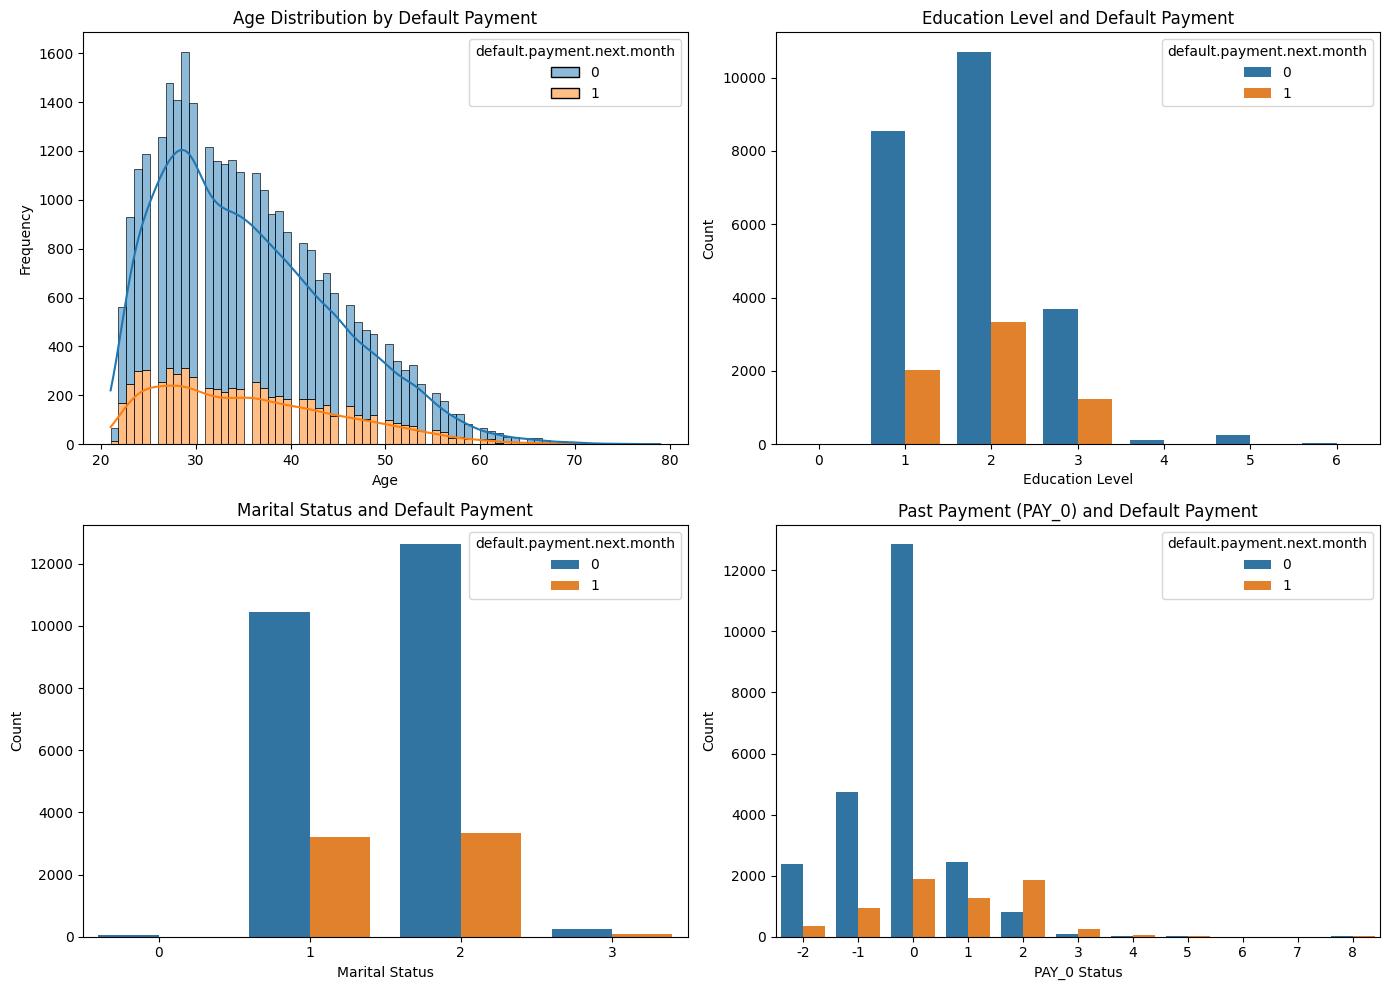

In [50]:
plt.figure(figsize=(14, 10))

# Relationship between age and default payment
plt.subplot(2, 2, 1)
sns.histplot(data=data, x='AGE', hue='default.payment.next.month', multiple='stack', kde=True)
plt.title('Age Distribution by Default Payment')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Relationship between education level and default payment
plt.subplot(2, 2, 2)
sns.countplot(x='EDUCATION', hue='default.payment.next.month', data=data)
plt.title('Education Level and Default Payment')
plt.xlabel('Education Level')
plt.ylabel('Count')

# Relationship between marital status and default payment
plt.subplot(2, 2, 3)
sns.countplot(x='MARRIAGE', hue='default.payment.next.month', data=data)
plt.title('Marital Status and Default Payment')
plt.xlabel('Marital Status')
plt.ylabel('Count')

# Relationship between past payment (PAY_0) and default payment
plt.subplot(2, 2, 4)
sns.countplot(x='PAY_0', hue='default.payment.next.month', data=data)
plt.title('Past Payment (PAY_0) and Default Payment')
plt.xlabel('PAY_0 Status')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

Looking further into the data

1. Age Distribution by Default Payment: The age distribution shows that younger applicants (in their 20s and 30s) have a higher frequency of defaulting on loans compared to older applicants.

2. Education Level and Default Payment: Applicants with a university-level education (level 2) appear to have the highest count, but the default rate is relatively similar across different education levels, with some variation.

3. Marital Status and Default Payment: Single applicants (status 2) have a higher default rate compared to married applicants (status 1). This could indicate that marital status might be a significant factor in predicting default.

4. Past Payment (PAY_0) and Default Payment: There's a strong relationship between past payment behavior and defaulting. Applicants who have a history of delayed payments (PAY_0 > 0) are more likely to default in the following month.

Based on this information we can see that each of these factors are important contributors to credit risk wether it be factors that lead to a default or not.

### Correlation Analysis

In [51]:
correlation_matrix = data.corr()
target_correlation = correlation_matrix['default.payment.next.month'].sort_values(ascending=False)
target_correlation

default.payment.next.month    1.000000
PAY_0                         0.324794
PAY_2                         0.263551
PAY_3                         0.235253
PAY_4                         0.216614
PAY_5                         0.204149
PAY_6                         0.186866
EDUCATION                     0.028006
AGE                           0.013890
BILL_AMT6                    -0.005372
BILL_AMT5                    -0.006760
BILL_AMT4                    -0.010156
BILL_AMT3                    -0.014076
BILL_AMT2                    -0.014193
BILL_AMT1                    -0.019644
MARRIAGE                     -0.024339
SEX                          -0.039961
PAY_AMT6                     -0.053183
PAY_AMT5                     -0.055124
PAY_AMT3                     -0.056250
PAY_AMT4                     -0.056827
PAY_AMT2                     -0.058579
PAY_AMT1                     -0.072929
LIMIT_BAL                    -0.153520
Name: default.payment.next.month, dtype: float64

Strong Positive Correlations:
PAY_0 (September 2005 repayment status) has the highest positive correlation with default risk (0.324). This suggests that recent repayment history is a strong predictor of whether an applicant will default.
PAY_2 to PAY_6 (repayment statuses for earlier months) also show positive correlations with default risk, though the strength of the correlation decreases as the payment history becomes older.

Weak Positive Correlations:
EDUCATION and AGE have very weak positive correlations with default risk, indicating they might not be strong predictors on their own.

Negative Correlations:
LIMIT_BAL (credit limit) has a moderate negative correlation (-0.153) with default risk, suggesting that applicants with higher credit limits are less likely to default.
PAY_AMT1 to PAY_AMT6 (amount paid in previous months) also show weak negative correlations with default risk, indicating that higher previous payments are associated with a lower risk of default.

Very Weak or No Correlation:
Features such as SEX, MARRIAGE, and BILL_AMT1 to BILL_AMT6 (bill amounts for previous months) have very weak correlations with default risk, suggesting they might not contribute much to the predictive power of the model.

### Feature Scaling 

I do not need to encode anything because the data has already encoded catergorical values for us.

I use the standardscaler to standardise my features by removing the mean and scaling it to unit variance, resulting in, values have a mean of 0 and standard dev. of 1. 

In [54]:
from sklearn.preprocessing import StandardScaler
features_to_scale = ['LIMIT_BAL', 'AGE', 
                     'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 
                     'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
                     'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

scaler = StandardScaler()

data[features_to_scale] = scaler.fit_transform(data[features_to_scale])

data

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,-1.136720,2,2,1,-1.246020,1.794564,1.782348,-0.696663,-0.666599,-1.530046,...,-0.672497,-0.663059,-0.652724,-0.341942,-0.227086,-0.296801,-0.308063,-0.314136,-0.293382,1
1,-0.365981,2,2,2,-1.029047,-0.874991,1.782348,0.138865,0.188746,0.234917,...,-0.621636,-0.606229,-0.597966,-0.341942,-0.213588,-0.240005,-0.244230,-0.314136,-0.180878,1
2,-0.597202,2,2,2,-0.161156,0.014861,0.111736,0.138865,0.188746,0.234917,...,-0.449730,-0.417188,-0.391630,-0.250292,-0.191887,-0.240005,-0.244230,-0.248683,-0.012122,0
3,-0.905498,2,2,1,0.164303,0.014861,0.111736,0.138865,0.188746,0.234917,...,-0.232373,-0.186729,-0.156579,-0.221191,-0.169361,-0.228645,-0.237846,-0.244166,-0.237130,0
4,-0.905498,1,2,1,2.334029,-0.874991,0.111736,-0.696663,0.188746,0.234917,...,-0.346997,-0.348137,-0.331482,-0.221191,1.335034,0.271165,0.266434,-0.269039,-0.255187,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.404759,1,3,1,0.381275,0.014861,0.111736,0.138865,0.188746,0.234917,...,0.695474,-0.149259,-0.384392,0.171250,0.611048,-0.012648,-0.113564,0.013131,-0.237130,0
29996,-0.134759,1,3,2,0.815221,-0.874991,-0.723570,-0.696663,-0.666599,0.234917,...,-0.532924,-0.577691,-0.652724,-0.231032,-0.103955,0.214255,-0.299828,-0.314136,-0.293382,0
29997,-1.059646,1,2,2,0.164303,3.574267,2.617654,1.809921,-0.666599,0.234917,...,-0.347961,-0.324517,-0.327687,-0.341942,-0.256990,0.952725,-0.039964,-0.183229,-0.119001,1
29998,-0.674276,1,3,1,0.598248,0.904712,-0.723570,0.138865,0.188746,0.234917,...,0.147844,-0.468063,0.169130,4.844316,-0.109033,-0.229895,-0.185120,3.152536,-0.191904,1


### Splitting the Data into testing and training

Note: stratify=y: This parameter ensures that the distribution of the target variable in the training and testing sets remains similar, which is especially important if my target variable becomes imbalanced.

Set test size to 20% of the data and 80% will be used for training.

In [55]:
from sklearn.model_selection import train_test_split

X = data.drop('default.payment.next.month', axis=1)
y = data['default.payment.next.month']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training features shape: {X_train.shape}")
print(f"Testing features shape: {X_test.shape}")
print(f"Training target shape: {y_train.shape}")
print(f"Testing target shape: {y_test.shape}")

Training features shape: (24000, 23)
Testing features shape: (6000, 23)
Training target shape: (24000,)
Testing target shape: (6000,)


In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

# The models I am using
logreg = LogisticRegression(random_state=42)
rf = RandomForestClassifier(random_state=42)
svm = SVC(probability=True, random_state=42)  # Use probability=True to allow ROC-AUC calculation
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Fitting the models on the training data
logreg.fit(X_train, y_train)
rf.fit(X_train, y_train)
svm.fit(X_train, y_train)
xgb.fit(X_train, y_train)

# Predicting on the test data
y_pred_logreg = logreg.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_svm = svm.predict(X_test)
y_pred_xgb = xgb.predict(X_test)

# Predicingt probabilities for ROC-AUC
y_prob_logreg = logreg.predict_proba(X_test)[:, 1]
y_prob_rf = rf.predict_proba(X_test)[:, 1]
y_prob_svm = svm.predict_proba(X_test)[:, 1]
y_prob_xgb = xgb.predict_proba(X_test)[:, 1]

# printing the evaluation metrics
def print_evaluation(y_test, y_pred, y_prob, model_name):
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred):.4f}")
    print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")
    print(f"ROC-AUC: {roc_auc_score(y_test, y_prob):.4f}")
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("-" * 50)

# Model Evaluation
print_evaluation(y_test, y_pred_logreg, y_prob_logreg, "Logistic Regression")
print_evaluation(y_test, y_pred_rf, y_prob_rf, "Random Forest")
print_evaluation(y_test, y_pred_svm, y_prob_svm, "Support Vector Machine (SVM)")
print_evaluation(y_test, y_pred_xgb, y_prob_xgb, "XGBoost")


c:\Users\P-DTC1\Credit-Risk Modelling project\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:44:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Model: Logistic Regression
Accuracy: 0.8078
Precision: 0.6891
Recall: 0.2389
F1 Score: 0.3548
ROC-AUC: 0.7075

Confusion Matrix:
[[4530  143]
 [1010  317]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      4673
           1       0.69      0.24      0.35      1327

    accuracy                           0.81      6000
   macro avg       0.75      0.60      0.62      6000
weighted avg       0.79      0.81      0.77      6000

--------------------------------------------------
Model: Random Forest
Accuracy: 0.8120
Precision: 0.6321
Recall: 0.3587
F1 Score: 0.4577
ROC-AUC: 0.7508

Confusion Matrix:
[[4396  277]
 [ 851  476]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4673
           1       0.63      0.36      0.46      1327

    accuracy                           0.81      6000
   macro avg       0.73      0.65      0.67      6

## Hyperparameter Tuning

### Tuning RandomForest

In [58]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': np.arange(100, 1000, 100),
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': np.arange(10, 100, 10),
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# RandomizedSearchCV for Random Forest
random_search_rf = RandomizedSearchCV(estimator=rf, param_distributions=param_grid_rf,
                                      n_iter=50, cv=5, verbose=2, random_state=42, n_jobs=-1, scoring='roc_auc')

random_search_rf.fit(X_train, y_train)

# Best parameters and score
print(f"Best parameters for Random Forest: {random_search_rf.best_params_}")
print(f"Best ROC-AUC score for Random Forest: {random_search_rf.best_score_:.4f}")

Fitting 5 folds for each of 50 candidates, totalling 250 fits


c:\Users\P-DTC1\Credit-Risk Modelling project\venv\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
80 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
53 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\P-DTC1\Credit-Risk Modelling project\venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\P-DTC1\Credit-Risk Modelling project\venv\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\P-DTC1\Credit-Risk Modelling project\venv\Lib\site-packages\sklearn\base.py", line 666, in

Best parameters for Random Forest: {'n_estimators': np.int64(300), 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': np.int64(10), 'bootstrap': False}
Best ROC-AUC score for Random Forest: 0.7819


### Tuning XGBoost

In [59]:
# parameter grid for XGBoost
param_grid_xgb = {
    'n_estimators': np.arange(100, 1000, 100),
    'max_depth': np.arange(3, 20, 2),
    'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4],
    'reg_alpha': [0, 0.01, 0.1, 1],
    'reg_lambda': [1, 1.5, 2, 2.5, 3]
}

# RandomizedSearchCV for XGBoost
random_search_xgb = RandomizedSearchCV(estimator=xgb, param_distributions=param_grid_xgb,
                                       n_iter=50, cv=5, verbose=2, random_state=42, n_jobs=-1, scoring='roc_auc')

random_search_xgb.fit(X_train, y_train)

# Best parameters and score
print(f"Best parameters for XGBoost: {random_search_xgb.best_params_}")
print(f"Best ROC-AUC score for XGBoost: {random_search_xgb.best_score_:.4f}")

Fitting 5 folds for each of 50 candidates, totalling 250 fits


c:\Users\P-DTC1\Credit-Risk Modelling project\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:20:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best parameters for XGBoost: {'subsample': 0.8, 'reg_lambda': 1.5, 'reg_alpha': 0.01, 'n_estimators': np.int64(600), 'max_depth': np.int64(7), 'learning_rate': 0.01, 'gamma': 0.3, 'colsample_bytree': 0.6}
Best ROC-AUC score for XGBoost: 0.7854


### Tuning SVM

Retraining SVM takes way too long in my case where it takes more than 40 minutes to complete running (Could be an issue with my pc)

## Retraining best 3 models 

In [61]:
# Retraining the Random Forest model using the best hyperparameters
best_rf = RandomForestClassifier(
    n_estimators=random_search_rf.best_params_['n_estimators'],
    max_features=random_search_rf.best_params_['max_features'],
    max_depth=random_search_rf.best_params_['max_depth'],
    min_samples_split=random_search_rf.best_params_['min_samples_split'],
    min_samples_leaf=random_search_rf.best_params_['min_samples_leaf'],
    bootstrap=random_search_rf.best_params_['bootstrap'],
    random_state=42
)
best_rf.fit(X_train, y_train)

# The same for XGBoost
best_xgb = XGBClassifier(
    n_estimators=random_search_xgb.best_params_['n_estimators'],
    max_depth=random_search_xgb.best_params_['max_depth'],
    learning_rate=random_search_xgb.best_params_['learning_rate'],
    subsample=random_search_xgb.best_params_['subsample'],
    colsample_bytree=random_search_xgb.best_params_['colsample_bytree'],
    gamma=random_search_xgb.best_params_['gamma'],
    reg_alpha=random_search_xgb.best_params_['reg_alpha'],
    reg_lambda=random_search_xgb.best_params_['reg_lambda'],
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)
best_xgb.fit(X_train, y_train)


c:\Users\P-DTC1\Credit-Risk Modelling project\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:06:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=0.3, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None,
              max_depth=np.int64(7), max_leaves=None, min_child_weight=None,
              missing=nan, monotone_constraints=None, multi_strategy=None,
              n_estimators=np.int64(600), n_jobs=None, num_parallel_tree=None,
              random_state=42, ...)

In [62]:
# model predictions
y_pred_best_rf = best_rf.predict(X_test)
y_pred_best_xgb = best_xgb.predict(X_test)

# probabilities for ROC-AUC
y_prob_best_rf = best_rf.predict_proba(X_test)[:, 1]
y_prob_best_xgb = best_xgb.predict_proba(X_test)[:, 1]

# Evaluation
print_evaluation(y_test, y_pred_best_rf, y_prob_best_rf, "Best Random Forest")
print_evaluation(y_test, y_pred_best_xgb, y_prob_best_xgb, "Best XGBoost")

Model: Best Random Forest
Accuracy: 0.8167
Precision: 0.6624
Recall: 0.3489
F1 Score: 0.4571
ROC-AUC: 0.7747

Confusion Matrix:
[[4437  236]
 [ 864  463]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4673
           1       0.66      0.35      0.46      1327

    accuracy                           0.82      6000
   macro avg       0.75      0.65      0.67      6000
weighted avg       0.80      0.82      0.79      6000

--------------------------------------------------
Model: Best XGBoost
Accuracy: 0.8180
Precision: 0.6648
Recall: 0.3572
F1 Score: 0.4647
ROC-AUC: 0.7792

Confusion Matrix:
[[4434  239]
 [ 853  474]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4673
           1       0.66      0.36      0.46      1327

    accuracy                           0.82      6000
   macro avg       0.75      0.65      0.68      600

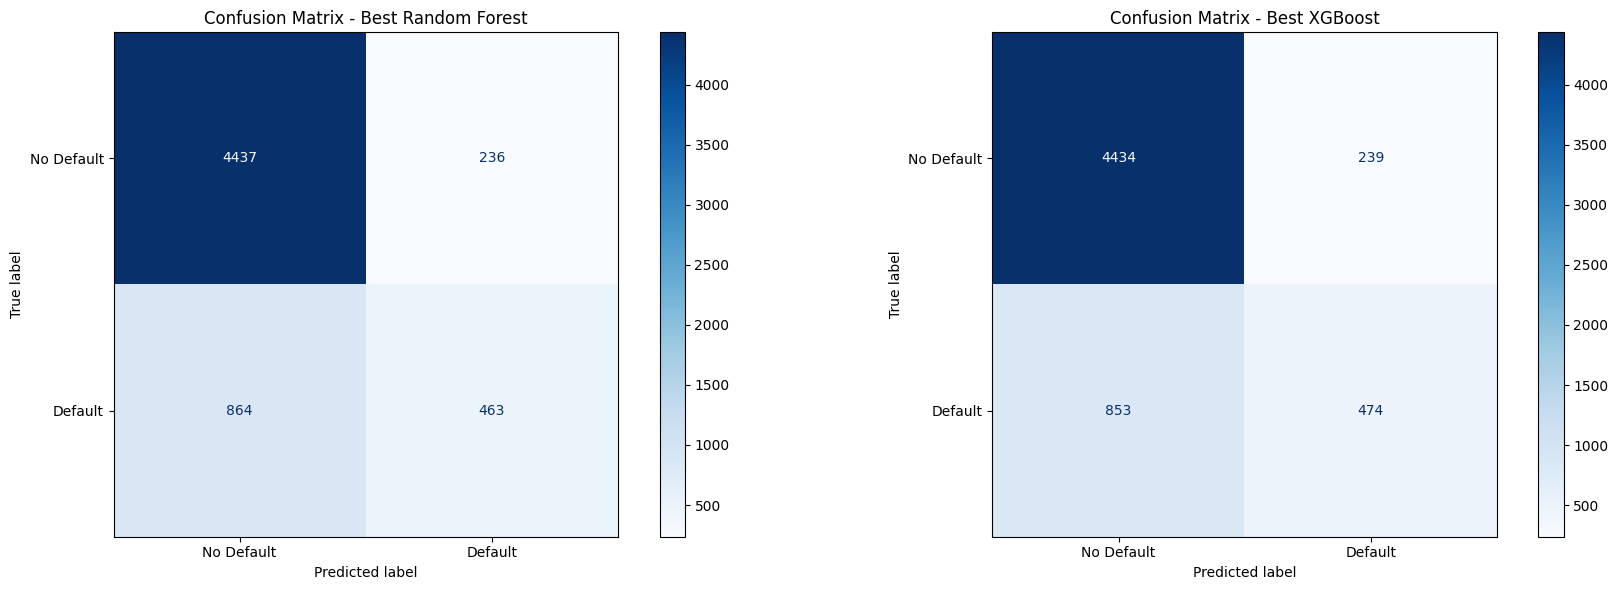

In [64]:
from sklearn.metrics import ConfusionMatrixDisplay

# confusion matrix
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

ConfusionMatrixDisplay.from_estimator(best_rf, X_test, y_test, ax=ax[0], cmap='Blues', display_labels=['No Default', 'Default'])
ax[0].set_title('Confusion Matrix - Best Random Forest')

ConfusionMatrixDisplay.from_estimator(best_xgb, X_test, y_test, ax=ax[1], cmap='Blues', display_labels=['No Default', 'Default'])
ax[1].set_title('Confusion Matrix - Best XGBoost')


plt.tight_layout()
plt.show()


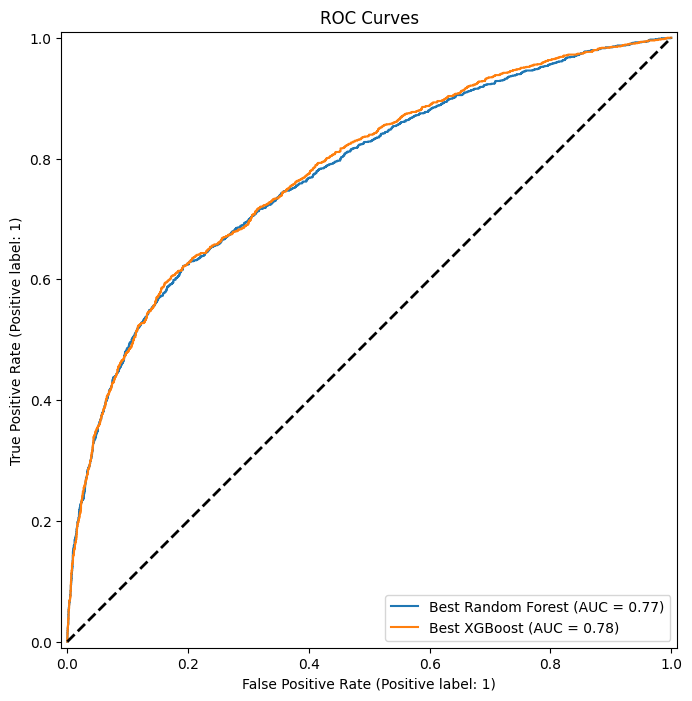

In [65]:
from sklearn.metrics import RocCurveDisplay

# ROC curves
plt.figure(figsize=(12, 8))

RocCurveDisplay.from_estimator(best_rf, X_test, y_test, ax=plt.gca(), name='Best Random Forest')
RocCurveDisplay.from_estimator(best_xgb, X_test, y_test, ax=plt.gca(), name='Best XGBoost')

plt.plot([0, 1], [0, 1], 'k--', lw=2)  
plt.title('ROC Curves')
plt.show()


We will test if the model performs better when the data is balanced.

Because our data is oversampled, we can use SMOTE to create synthetic examples in our data.  

In [71]:
from imblearn.over_sampling import SMOTE

# SMOTE
smote = SMOTE(random_state=42)

# Applying SMOTE to balance the data
X_resampled, y_resampled = smote.fit_resample(X, y)

# Checking new distribution of the target variable
print(f"Original target distribution: {y.value_counts().to_dict()}")
print(f"Resampled target distribution: {pd.Series(y_resampled).value_counts().to_dict()}")


Original target distribution: {0: 23364, 1: 6636}
Resampled target distribution: {1: 23364, 0: 23364}


In [72]:
X_train_balanced, X_test_balanced, y_train_balanced, y_test_balanced = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# Displaying the shape of the resulting datasets
print(f"Training features shape: {X_train_balanced.shape}")
print(f"Testing features shape: {X_test_balanced.shape}")

Training features shape: (37382, 23)
Testing features shape: (9346, 23)


In [73]:
# Retrain the RandomForest model using the balanced training data
best_rf_balanced = RandomForestClassifier(
    n_estimators=random_search_rf.best_params_['n_estimators'],
    max_features=random_search_rf.best_params_['max_features'],
    max_depth=random_search_rf.best_params_['max_depth'],
    min_samples_split=random_search_rf.best_params_['min_samples_split'],
    min_samples_leaf=random_search_rf.best_params_['min_samples_leaf'],
    bootstrap=random_search_rf.best_params_['bootstrap'],
    random_state=42
)
best_rf_balanced.fit(X_train_balanced, y_train_balanced)

RandomForestClassifier(bootstrap=False, max_depth=np.int64(10),
                       max_features='log2', min_samples_leaf=4,
                       n_estimators=np.int64(300), random_state=42)

In [74]:
# Retrain the XGBoost model using the balanced training data
best_xgb_balanced = XGBClassifier(
    n_estimators=random_search_xgb.best_params_['n_estimators'],
    max_depth=random_search_xgb.best_params_['max_depth'],
    learning_rate=random_search_xgb.best_params_['learning_rate'],
    subsample=random_search_xgb.best_params_['subsample'],
    colsample_bytree=random_search_xgb.best_params_['colsample_bytree'],
    gamma=random_search_xgb.best_params_['gamma'],
    reg_alpha=random_search_xgb.best_params_['reg_alpha'],
    reg_lambda=random_search_xgb.best_params_['reg_lambda'],
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)
best_xgb_balanced.fit(X_train_balanced, y_train_balanced)

c:\Users\P-DTC1\Credit-Risk Modelling project\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:21:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=0.3, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None,
              max_depth=np.int64(7), max_leaves=None, min_child_weight=None,
              missing=nan, monotone_constraints=None, multi_strategy=None,
              n_estimators=np.int64(600), n_jobs=None, num_parallel_tree=None,
              random_state=42, ...)

In [75]:
# Predictions for each model on the balanced test set
y_pred_best_rf_balanced = best_rf_balanced.predict(X_test_balanced)
y_pred_best_xgb_balanced = best_xgb_balanced.predict(X_test_balanced)

# Predicted probabilities for ROC-AUC
y_prob_best_rf_balanced = best_rf_balanced.predict_proba(X_test_balanced)[:, 1]
y_prob_best_xgb_balanced = best_xgb_balanced.predict_proba(X_test_balanced)[:, 1]

print_evaluation(y_test_balanced, y_pred_best_rf_balanced, y_prob_best_rf_balanced, "Best Random Forest (Balanced)")
print_evaluation(y_test_balanced, y_pred_best_xgb_balanced, y_prob_best_xgb_balanced, "Best XGBoost (Balanced)")


Model: Best Random Forest (Balanced)
Accuracy: 0.7650
Precision: 0.8130
Recall: 0.6884
F1 Score: 0.7455
ROC-AUC: 0.8450

Confusion Matrix:
[[3933  740]
 [1456 3217]]

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.84      0.78      4673
           1       0.81      0.69      0.75      4673

    accuracy                           0.77      9346
   macro avg       0.77      0.77      0.76      9346
weighted avg       0.77      0.77      0.76      9346

--------------------------------------------------
Model: Best XGBoost (Balanced)
Accuracy: 0.8108
Precision: 0.8570
Recall: 0.7462
F1 Score: 0.7978
ROC-AUC: 0.8930

Confusion Matrix:
[[4091  582]
 [1186 3487]]

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.88      0.82      4673
           1       0.86      0.75      0.80      4673

    accuracy                           0.81      9346
   macro avg       0.82      0

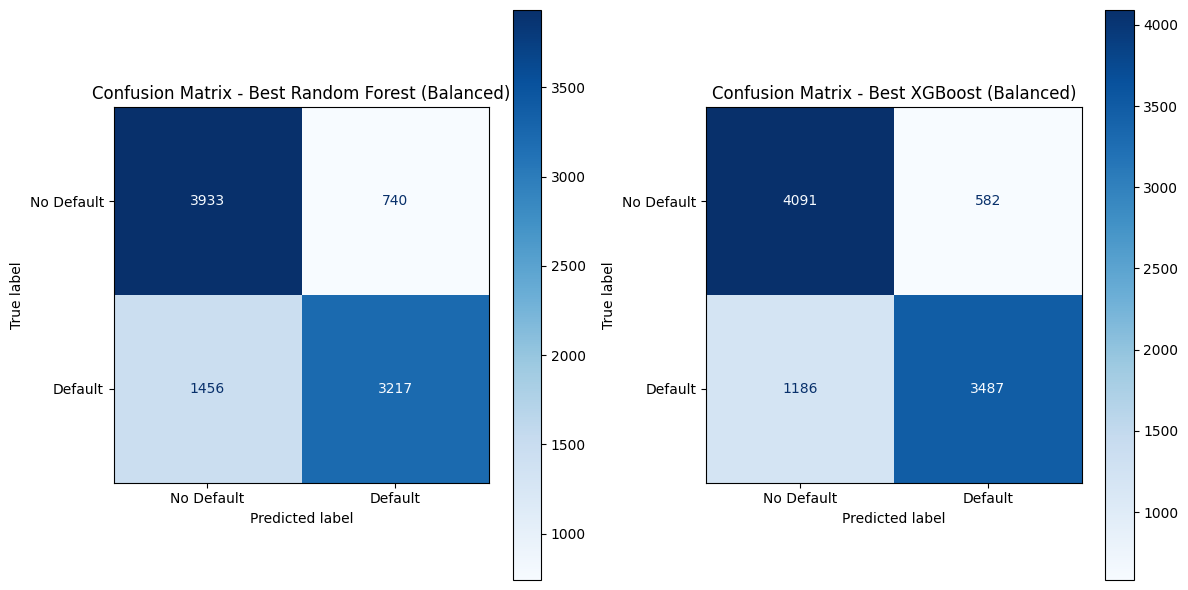

In [76]:
from sklearn.metrics import ConfusionMatrixDisplay

# confusion matrix for each balanced model
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ConfusionMatrixDisplay.from_estimator(best_rf_balanced, X_test_balanced, y_test_balanced, ax=ax[0], cmap='Blues', display_labels=['No Default', 'Default'])
ax[0].set_title('Confusion Matrix - Best Random Forest (Balanced)')

ConfusionMatrixDisplay.from_estimator(best_xgb_balanced, X_test_balanced, y_test_balanced, ax=ax[1], cmap='Blues', display_labels=['No Default', 'Default'])
ax[1].set_title('Confusion Matrix - Best XGBoost (Balanced)')

plt.tight_layout()
plt.show()

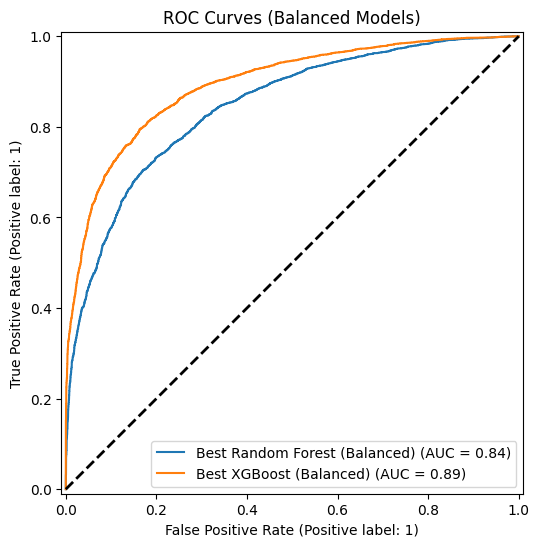

In [77]:
from sklearn.metrics import RocCurveDisplay

# ROC curves for each balanced model
plt.figure(figsize=(10, 6))

RocCurveDisplay.from_estimator(best_rf_balanced, X_test_balanced, y_test_balanced, ax=plt.gca(), name='Best Random Forest (Balanced)')
RocCurveDisplay.from_estimator(best_xgb_balanced, X_test_balanced, y_test_balanced, ax=plt.gca(), name='Best XGBoost (Balanced)')

plt.plot([0, 1], [0, 1], 'k--', lw=2)  
plt.title('ROC Curves (Balanced Models)')
plt.show()


### XGBoost is our best classifier

Here we can see that XGBoost, when the data is balanced, performs significantly better at identifying who will default compared to RandomForest. These results are far better than previously, which was ROC-AUC=0.78.  

I will now cross-validate the best model, XGBoost.

In [79]:
from sklearn.model_selection import cross_val_score, cross_validate

cv_results = cross_validate(
    best_xgb_balanced, X_resampled, y_resampled, 
    cv=5, 
    scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'],
    return_train_score=True
)

print("Cross-Validation Results:")
print(f"Mean Accuracy: {np.mean(cv_results['test_accuracy']):.4f}")
print(f"Mean Precision: {np.mean(cv_results['test_precision']):.4f}")
print(f"Mean Recall: {np.mean(cv_results['test_recall']):.4f}")
print(f"Mean F1 Score: {np.mean(cv_results['test_f1']):.4f}")
print(f"Mean ROC-AUC: {np.mean(cv_results['test_roc_auc']):.4f}")

c:\Users\P-DTC1\Credit-Risk Modelling project\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:42:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\P-DTC1\Credit-Risk Modelling project\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:42:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\P-DTC1\Credit-Risk Modelling project\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:42:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.



Cross-Validation Results:
Mean Accuracy: 0.8026
Mean Precision: 0.8475
Mean Recall: 0.7349
Mean F1 Score: 0.7796
Mean ROC-AUC: 0.8841


Although, we achieved a very minor decrease in Accuracy, we saw overall increases in our other metrics with our model being able to acheive an AUC of 0.88 which is exceptional. Our model has a strong ability to distinguish between the two classes of defaulting and non-defaulting correctly. The means calculated for metrics were slightly lower overall compared to our balanced results, but only by a very small amount.